In [12]:
import serial
from datetime import datetime as dt
import os
import time

uart1 = '/dev/cu.usbserial-14330'

ser1 = serial.Serial(uart1, baudrate=115200, timeout=0.030);

In [13]:
ser1.flush()

while ser1.in_waiting:
    line1 = ser1.read_until(b'\r\n').decode()[:-2]    

exp_name = dt.now().strftime('%Y-%m-%d_%H-%M-%S')
print(exp_name)

exp_path = os.path.join('Data', exp_name)
fname1 = exp_path+'_uart1.sole'
with open(fname1, 'w+') as f1:

    while True:
        while ser1.in_waiting:
            line1 = (ser1.read_until(b'\r\n')).decode()
            f1.write(line1)

        print(line1[:-2], end='               \r')
#             time.sleep(0.05)

2022-12-05_21-15-28


KeyboardInterrupt: 

In [14]:
pd.read_csv(fname1, sep = ' ', header=None)

,0,1,2,3,4,5,6,7,8,9,10,11
0,3304,3599,3613,3584,3636,0,0,0,0,0,L,NaN
1,3304,3591,3613,3582,3633,0,0,0,0,0,L,NaN
2,3303,3600,3614,3584,3635,0,0,0,0,0,L,NaN
3,3304,3598,3612,3584,3636,0,0,0,0,0,L,NaN
4,3304,3598,3613,3585,3635,0,0,0,0,0,L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
36411,3266,3562,3612,3573,3597,0,0,0,0,0,L,NaN
36412,3266,3562,3612,3575,3597,0,0,0,0,0,L,NaN
36413,3266,3561,3612,3573,3597,0,0,0,0,0,L,NaN
36414,3266,3561,3612,3575,3597,0,0,0,0,0,L,NaN


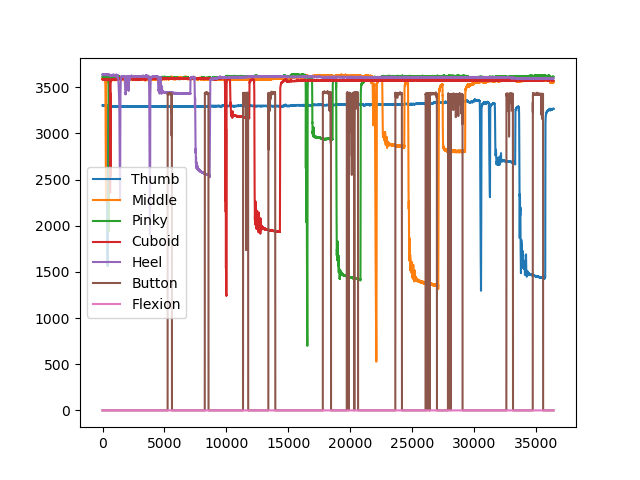

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget

df1 = pd.read_csv(fname1, sep = ' ', header=None)[[0,1,2,3,4,5,9]]\
        .rename(columns=dict(zip([0,1,2,3,4,5,9], ['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel', 'Button', 'Flexion'])))\
        .iloc[:]

fig, axx = plt.subplots(1,1,sharex=True)

plt.plot(df1)
plt.legend(df1.columns)
